In [1]:
from imdb import IMDb

imdb = IMDb()

AUTO_SCALE = True

BACKGROUND = 'black'
MIDDLEGROUND = 'gray'
FOREGROUND = 'white'

TITLE_SIZE = 16
LABEL_SIZE = TITLE_SIZE - 3


COLORS = [
    '#e6194b',
    '#3cb44b',
    '#ffe119',
    '#4363d8',
    '#f58231',
    '#911eb4',
    '#46f0f0',
    '#f032e6',
    '#bcf60c',
    '#fabebe',
    '#008080',
    '#e6beff',
    '#9a6324',
    '#fffac8',
    '#800000',
    '#aaffc3',
    '#808000',
    '#ffd8b1',
    '#000075',
]

In [2]:
code = "0417299"

In [3]:
show = imdb.get_movie(code)
imdb.update(show, 'episodes')

number_of_seasons = show["number of seasons"]
number_of_episodes = show["number of episodes"]

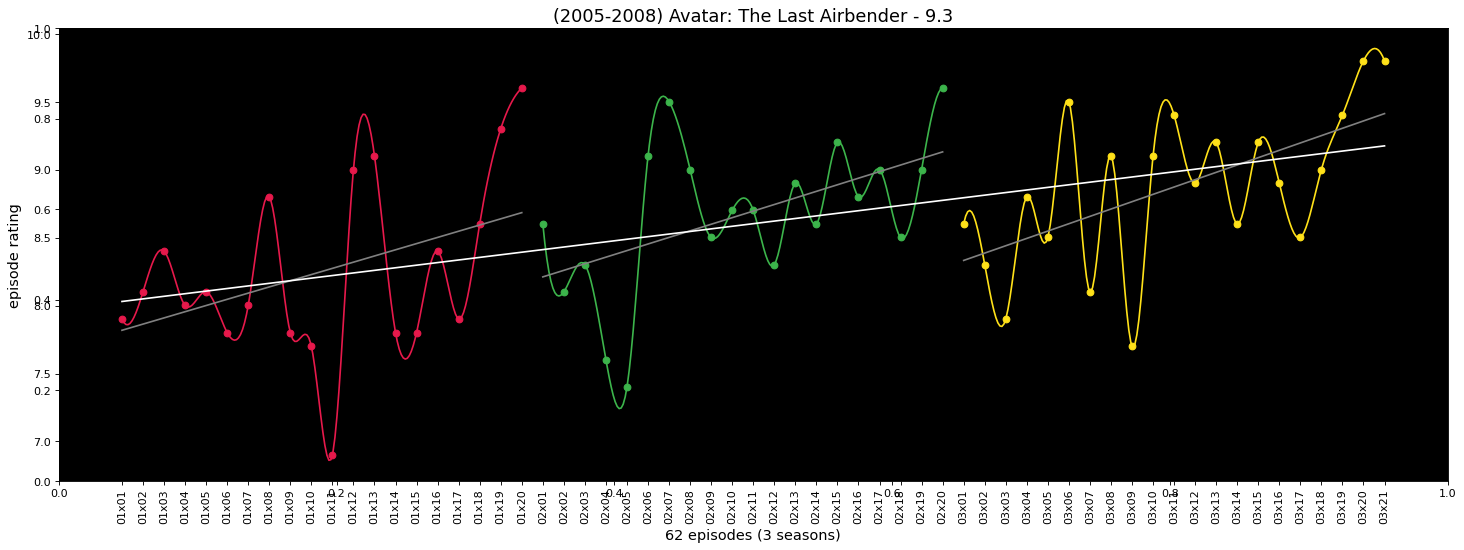

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# CREATE FIGURE
fig = plt.figure(
    figsize=(10 + 5 * max(number_of_episodes / 25, 1), 7.5),
    dpi=80,
)

# SET TITLE
plt.title(
    f"({show['series years']}) {show['title']} - {show['rating']}",
    fontsize=TITLE_SIZE,
)

# SET UP AXIS
ax = plt.axes(facecolor=BACKGROUND)
ax.set_prop_cycle(color=COLORS)

# SET LABELS
if number_of_seasons == 1:
    x_label = f"{number_of_episodes} episodes (1 season)"
else:
    x_label = f"{number_of_episodes} episodes ({number_of_seasons} seasons)"

plt.xlabel(x_label, fontsize=LABEL_SIZE)
plt.ylabel("episode rating", fontsize=LABEL_SIZE)

# POPULATE
xlabels = []
gx, gy = [], []

index = 0

for season, season_episodes in show.data['episodes'].items():
    if season < 1:
        continue

    x, y = [], []
    episodes = []

    for episode in season_episodes.values():
        if episode['episode'] == 0:
            continue

        xlabels.append(f"{episode['season']:02}x{episode['episode']:02}")

        x.append(index)
        gx.append(index)

        y.append(episode["rating"])
        gy.append(episode["rating"])

        episodes.append(episode)
        index += 1

    z = np.polyfit(x, y, deg=1)
    p = np.poly1d(z)

    sp_x = np.linspace(
        x[-len(episodes)],
        x[-1],
        len(episodes) * 10
    )
    sp_y = interpolate.make_interp_spline(x, y)(sp_x)

    plt.plot(sp_x, sp_y)

    plt.scatter(x, y)
    plt.plot(x, p(x), color=MIDDLEGROUND)

# SET UP TICKS
plt.xticks(range(0, len(xlabels)), rotation=90)
ax.set_xticklabels(xlabels)

# PLOT
gz = np.polyfit(gx, gy, deg=1)
gp = np.poly1d(gz)

plt.plot(gx, gp(gx), color=FOREGROUND)

print()